# Montages and Montaging

# What is a montage?

The PyOPIA montages are built from randomly selecting exported particle images from a processed dataset, and packaging them in order of large-to-small. These are sequentially instered into a random vacant position in "canvas" that is eventually filled by particles to become the montage. This way of building the montages therefore attempts to maintain a similar representation of the measured particle size distribution, but is not a representation of particle concentration.

# How to make a montage

First, follow the steps for {ref}`Exploring-pipeline-data` so we have some 'stats' from running a pipeline i.e: 

```
MyPipeline.data['stats']
```

In [15]:
import pyopia.background
import pyopia.classify
import pyopia.instrument.silcam
import pyopia.instrument.holo
import pyopia.io
import pyopia.pipeline
import pyopia.plotting
import pyopia.process
import pyopia.statistics
import pyopia.exampledata

import os
import matplotlib.pyplot as plt

model_path = pyopia.exampledata.get_example_model(os.getcwd())

# Prepare folders
os.makedirs('proc', exist_ok=True)

# remove pre-existing output file (as statistics for each image are appended to it)
datafile_nc = os.path.join('proc', 'test')
if os.path.isfile(datafile_nc + '-STATS.nc'):
  os.remove(datafile_nc + '-STATS.nc')
  
toml_settings = pyopia.io.load_toml('config.toml')

# Initialise the pipeline and run the initial steps
MyPipeline = pyopia.pipeline.Pipeline(toml_settings)

# Load an image (from the test suite)
filename = pyopia.exampledata.get_example_silc_image(os.getcwd())

# Process the image to obtain the stats dataframe
MyPipeline.run(filename)

Initialising pipeline
Classify  ready with: {'model_path': 'keras_model.h5'}  and data dict_keys(['cl', 'settings', 'skip_next_steps', 'raw_files'])
Example image already exists. Skipping download.
SilCamLoad  ready with: {}  and data dict_keys(['cl', 'settings', 'skip_next_steps', 'raw_files', 'filename'])
ImagePrep  ready with: {'image_level': 'imraw'}  and data dict_keys(['cl', 'settings', 'skip_next_steps', 'raw_files', 'filename', 'timestamp', 'imraw'])
Segment  ready with: {'threshold': 0.85, 'segment_source': 'im_minimum'}  and data dict_keys(['cl', 'settings', 'skip_next_steps', 'raw_files', 'filename', 'timestamp', 'imraw', 'im_minimum', 'imref'])
segment
clean
CalculateStats  ready with: {'export_outputpath': 'silcam_rois', 'roi_source': 'imref'}  and data dict_keys(['cl', 'settings', 'skip_next_steps', 'raw_files', 'filename', 'timestamp', 'imraw', 'im_minimum', 'imref', 'imbw'])
statextract
21.7% saturation
measure
  870 particles found
EXTRACTING 870 IMAGES from 870
StatsT

## Exporting ROIs

In the statextract step, it is important to configure the 'export_outputpath' parameter in the toml settings. If export_outputpath is not specifies, then particle ROIs(regions of interest) will not be saved, and montaged cannot be built.

```
[steps.statextract]
pipeline_class = 'pyopia.process.CalculateStats'
export_outputpath = "exported_rois"
```

This creates a folder called 'exported_rois' that contains h5 files for each processed raw image that contained particles. The names of the ROIs are given by 'export name' column in the STATS data, which includes their unique particle number ID as part of the name. This can be used to make nice looking summary montages, for example, using {func}`pyopia.statistics.make_montage` and {func}`pyopia.plotting.montage_plot`. To do, this, you need to specify a folder with 'export_outputpath' in the {class}´pyopia.process.CalculateStats`` step:

If you don't want to export ROIs, then just leave out the 'export_outputpath' option, or set it to 'None'.

rofiles: 870
reducing particles by factor of 2
rofiles: 435
making a montage - this might take some time....


100%|██████████| 435/435 [00:00<00:00, 6916.62it/s]

montage complete


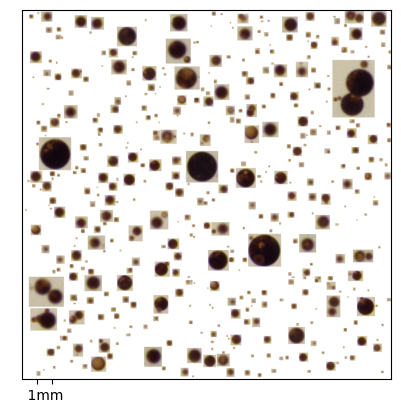

In [16]:
montage = pyopia.statistics.make_montage(MyPipeline.data['stats'],
                                         MyPipeline.settings['general']['pixel_size'],
                                         MyPipeline.settings['steps']['statextract']['export_outputpath'],
                                         eyecandy=False)

pyopia.plotting.montage_plot(montage, MyPipeline.settings['general']['pixel_size'])

The parameter 'eyecandy' is given to {func}`pyopia.statistics.make_montage` defaults to 'True', which will stratch the contrast of low-contrast particle images and often increases visual clarity for semi-transparant like material.

For oil or bubble dominated datasets, then 'eyecandy' can be set to 'False' for better presentation.

Now you can make montages!

Please refer to the API documentation for more advanced opional inputs that can also be given to {func}`pyopia.statistics.make_montage`